In [1]:
import pandas as pd
%matplotlib inline

In [2]:
news = pd.read_csv('Nasdaq_news_summary.csv')
sector = pd.read_csv('sp500_tickers_sectors.csv')

In [3]:
news = news.drop('symbol.1',axis = 1)

In [4]:
news['publish_date'] = pd.to_datetime(news['publish_date'],format ='%Y-%m-%d %H:%M:%S')

In [5]:
news.groupby(news.publish_date.dt.year).count()

,symbol,title,publish_date,url,body
publish_date,,,,,
2017,3,3,3,3,3
2018,79,79,79,79,79
2019,6259,6259,6259,6259,6259
2020,3531,3531,3531,3531,3531


# No. of news by year

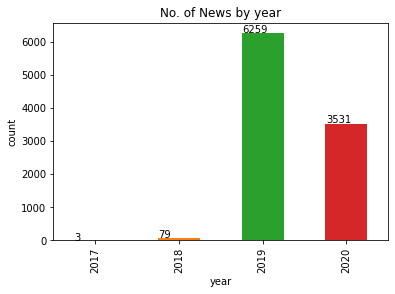

In [22]:
ax = news.groupby(news.publish_date.dt.year).url.count().plot(kind = 'bar',title = 'No. of News by year',color = ['C0', 'C1', 'C2','C3'])
ax.set_xlabel("year")
ax.set_ylabel("count")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# No. of news by month

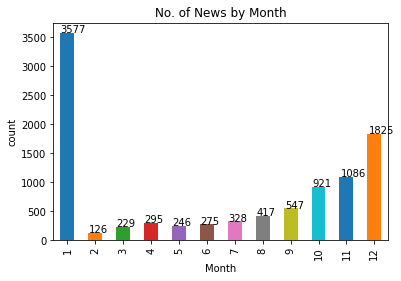

In [23]:
ax2 = news.groupby(news.publish_date.dt.month).url.count().plot(kind = 'bar',title = 'No. of News by Month',color = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12'])
ax2.set_xlabel("Month")
ax2.set_ylabel("count")
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# No. of news by day

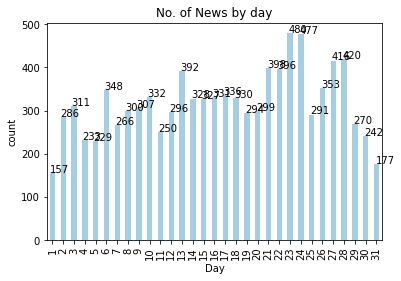

In [24]:
ax3 = news.groupby(news.publish_date.dt.day).url.count().plot(kind = 'bar',title = 'No. of News by day',colormap = 'Paired')
ax3.set_xlabel("Day")
ax3.set_ylabel("count")
for p in ax3.patches:
    ax3.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Extraction of IT sector

In [10]:
sector = sector.rename(columns={'tickers': 'symbol'})
sector

,symbol,sectors
0,BKNG,consumer_discretionary
1,COO,health_care
2,AAL,industrials
3,GD,industrials
4,KR,consumer_staples
...,...,...
500,MSFT,information_technology
501,LIN,materials
502,DVA,health_care
503,STE,health_care


In [11]:
pd = pd.merge(sector,news,on = 'symbol', how = 'left')

In [12]:
it = pd[pd.sectors == 'information_technology']

In [13]:
pd.sectors.unique()

array(['consumer_discretionary', 'health_care', 'industrials',
       'consumer_staples', 'materials', 'real_estate', 'utilities',
       'information_technology', 'financials', 'communication_services',
       'energy', 'communication_services\n'], dtype=object)

In [20]:
it.to_csv('IT.csv')

In [14]:
it

,symbol,sectors,title,publish_date,url,body
261,LRCX,information_technology,SOXX LRCX NXPI AMAT: ETF Inflow Alert,2020-01-27 10:55:00,https://www.nasdaq.com/articles/soxx-lrcx-nxpi...,Looking today at week-over-week shares outstan...
262,LRCX,information_technology,Notable Friday Option Activity: ATGE LRCX LULU,2020-01-24 15:23:00,https://www.nasdaq.com/articles/notable-friday...,Looking at options trading activity among comp...
263,LRCX,information_technology,Why MKS Instruments Surged 70% in 2019,2020-01-10 17:43:00,https://www.nasdaq.com/articles/why-mks-instru...,What happenedShares in electronic test and mea...
264,LRCX,information_technology,Monday Sector Laggards: Industrial Consumer P...,2020-01-06 15:16:00,https://www.nasdaq.com/articles/monday-sector-...,In afternoon trading on Monday Industrial sto...
265,LRCX,information_technology,SOXX AMD MU LRCX: Large Outflows Detected a...,2020-01-06 10:57:00,https://www.nasdaq.com/articles/soxx-amd-mu-lr...,Looking today at week-over-week shares outstan...
...,...,...,...,...,...,...
9797,MSFT,information_technology,These 4 U.S. Stocks Have Reached a $1 Trillion...,2020-01-27 07:33:00,https://www.nasdaq.com/articles/these-4-u.s.-s...,Over the past two years Apple (NASDAQ: AAPL) ...
9798,MSFT,information_technology,The 9 Biggest Virtual Reality Stocks,2020-01-26 12:17:00,https://www.nasdaq.com/articles/the-9-biggest-...,Virtual reality (VR) was once thought to be so...
9799,MSFT,information_technology,The 9 Biggest Virtual Reality Stocks,2020-01-26 12:17:00,https://www.nasdaq.com/articles/the-9-biggest-...,Virtual reality (VR) was once thought to be so...
9800,MSFT,information_technology,2 Stocks That Turned $500 Into $1 Million,2020-01-26 08:15:00,https://www.nasdaq.com/articles/2-stocks-that-...,Some people may be marveling at how cloud soft...


No. of News By companies

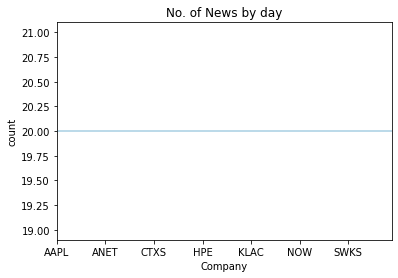

In [56]:
ax4 = it.groupby(it.symbol).url.count().plot(kind = 'line',title = 'No. of News by day',colormap = 'Paired')
ax4.set_xlabel("Company")
ax4.set_ylabel("count")
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))